In [1]:
import astropy.units as u
from astropy.units import Quantity
import numpy as np
import sys
sys.path.append('/Users/clairewilliams/opt/anaconda3/lib/python3.9/site-packages')
import pandas
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support

sys.path.append('../src')

# from timescales.data import build_bulk_energy_grid
from timescales import TimescaleEnsemble
from timescales.profiles.power_law import PowerLawProfile

from timescales.physics.collisions import collision_timescale
from timescales.physics.relaxation import relaxation_timescale

from timescales.analysis.tables import structural_table, timescale_table
from timescales.analysis.recipes import generate_timescale_comparison,collision_vs_main_sequence, destructive_colllision_criterion


In [2]:
#define parameters
cluster_mass= 1e6 *u.Msun
alpha= 1.25
r0 = 0.25 *u.pc
rho0 = 1.35*1e6 *u.Msun /(u.pc**3)
ecc = 0.
Mstar = 1*u.Msun
grid = {'M':np.array([cluster_mass.value])*cluster_mass.unit,'R':np.array([r0.value])*r0.unit}

In [5]:
tmodel = TimescaleEnsemble(grid, 
                        densityModel='powerLawBH',
                        Nsampling =100,
                        timescales_kwargs = {'e':ecc,'Mstar':Mstar},
                        profile_kwargs={'alpha':alpha, 'rho0':rho0, 'M_bh':4*10**6*u.Msun},
                        )

Using powerLawBH model with properties:
alpha=1.25
rho0=1350000.0 solMass / pc3
M_bh=4000000.0 solMass
Using parameters for timescale evaluation
e=0.0
Mstar=1.0 solMass


In [6]:
t_coll = collision_timescale(tmodel.n[0],
                        tmodel.sigma[0],
                        tmodel.Mstar,
                        e = tmodel.e,
                        alpha = tmodel.alpha).to('yr')

t_rel = relaxation_timescale(
                        tmodel.sigma[0],
                        tmodel.rho[0],
                        tmodel.Mstar,
                        coulomb = 10).to('yr')


In [7]:
table5 = generate_timescale_comparison(tmodel, as_ = 'pandas')


will use defaults for  {'Mcollisions': <Quantity 1. solMass>, 'n_unit': <Quantity 1. 1 / cm3>, 'v_unit': Unit("cm / s"), 'Mstar_unit': Unit("solMass")}
Selected coulomb function based on BH or not.
will use defaults for  {'v_unit': Unit("km / s"), 'rho_unit': Unit("g / cm3"), 'mass_unit': Unit("solMass")}


In [8]:
table5

,system_id,r,t_coll,t_relax,sigma/vesc,massloss,t_relax/t_coll,t_ms/t_relax,t_ms/t_coll,shortest,t_ms
0,0,0.001 pc,39288753.85528838 yr,28314177526.80982 yr,4.476720608704612,1.0,720.6687601011465,0.3531799569502349,254.52576166790212,t_coll,10000000000.0 yr
1,0,0.0010573569305266988 pc,43199008.30919149 yr,27922140467.196198 yr,4.353607138140051,1.0,646.3606818783195,0.3581387326572729,231.48679544739207,t_coll,10000000000.0 yr
2,0,0.0011180036785328434 pc,47491400.369603485 yr,27535532584.1986 yr,4.233879442106377,1.0,579.8003927006228,0.3631671175933074,210.56443739655285,t_coll,10000000000.0 yr
3,0,0.0011821289378510453 pc,52202169.21210594 yr,27154278782.42028 yr,4.1174444114369235,1.0,520.175295246602,0.3682660872758666,191.5629206780348,t_coll,10000000000.0 yr
4,0,0.001249932225212968 pc,57370819.43603549 yr,26778305013.13284 yr,4.004211497756649,1.0,466.75828019135764,0.37343663070144717,174.30463950666262,t_coll,10000000000.0 yr
...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.20001084455391493 pc,40377167755.624504 yr,7820306651.756272 yr,0.32057350473123913,0.0,0.1936814067565923,1.2787222349847644,0.24766472132278294,t_relax,10000000000.0 yr
96,0,0.2114828526695802 pc,42360404528.38749 yr,7741678244.5894 yr,0.3121565100441029,0.0,0.1827574200666893,1.291709585965927,0.23606951140654428,t_relax,10000000000.0 yr
97,0,0.2236128599577374 pc,44435573932.811066 yr,7666769428.675014 yr,0.30399923086755726,0.0,0.17253674815290052,1.3043303431818765,0.22504491592975773,t_relax,10000000000.0 yr
98,0,0.23643860723121 pc,46607737400.17384 yr,7595766802.821717 yr,0.2960964620904483,0.0,0.1629722279286912,1.3165227763818586,0.2145566499858176,t_relax,10000000000.0 yr


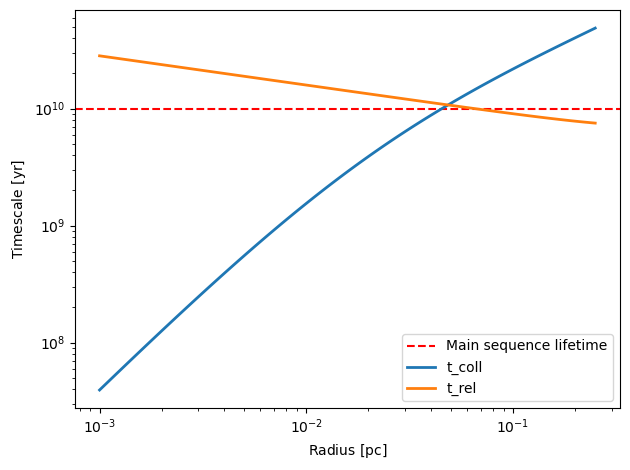

In [10]:
# fig, ax = plt.subplots(figsize=(6, 4))

r = u.Quantity(table5['r']).to(u.pc)            # pick your unit
t_coll = u.Quantity(table5['t_coll']).to(u.yr)
t_rel = u.Quantity(table5['t_relax']).to(u.yr)

fig, ax = plt.subplots()
plt.axhline(y=1e10, color='r', linestyle='--', label='Main sequence lifetime')

with quantity_support():                        # lets mpl handle Quantity directly
    ax.plot(r, t_coll, lw=2, label="t_coll")
    ax.plot(r, t_rel, lw=2, label="t_rel")
    ax.set_xlabel(f"r [{r.unit}]")
    ax.set_ylabel(f"$t_{{\mathrm{{coll}}}}$ [{t_coll.unit}]")

# Axes labels with units
ax.set_xlabel(f"Radius [{r.unit.to_string('latex_inline')}]")
ax.set_ylabel(f"Timescale [{t_coll.unit.to_string('latex_inline')}]")

# Log scale for both axes (optional)
ax.set_xscale('log')
ax.set_yscale('log')

# Optional grid
# ax.grid(True, which='both', ls='--', alpha=0.5)

# Title
# ax.set_title("Astrophysical Timescale vs. Radius")
plt.legend()

plt.tight_layout()
plt.show()
